In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from string import punctuation
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
sns.set(rc={'figure.figsize':(11.7,8.27)})
from nltk.util import bigrams, trigrams, ngrams

[nltk_data] Downloading package punkt to /Users/kdhawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kdhawan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kdhawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kdhawan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/kdhawan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/kdhawan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [20]:
ratings = pd.read_csv('Data/ramen-ratings.csv')
ratings.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# Preprocessing

Convert text to lower string and cast stars as a float 

In [51]:
np.unique(ratings['Stars'])


array([0.   , 0.1  , 0.25 , 0.5  , 0.75 , 0.9  , 1.   , 1.1  , 1.25 ,
       1.5  , 1.75 , 1.8  , 2.   , 2.1  , 2.125, 2.25 , 2.3  , 2.5  ,
       2.75 , 2.8  , 2.85 , 2.9  , 3.   , 3.1  , 3.125, 3.2  , 3.25 ,
       3.3  , 3.4  , 3.5  , 3.6  , 3.65 , 3.7  , 3.75 , 3.8  , 4.   ,
       4.125, 4.25 , 4.3  , 4.5  , 4.75 , 5.   ])

In [52]:
#drop unrated ramen reviews
unrated_idx = ratings[ratings['Stars'] == 'Unrated'].index

ratings = ratings.drop(unrated_idx)


/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [23]:

ratings['Brand'] = ratings['Brand'].str.lower() 
ratings['Variety'] = ratings['Variety'].str.lower()
ratings['Stars'] = ratings['Stars'].astype('float')
ratings.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,new touch,t's restaurant tantanmen,Cup,Japan,3.75,NaN
1,2579,just way,noodles spicy hot sesame spicy hot sesame guan...,Pack,Taiwan,1.00,NaN
2,2578,nissin,cup noodles chicken vegetable,Cup,USA,2.25,NaN
3,2577,wei lih,gge ramen snack tomato flavor,Pack,Taiwan,2.75,NaN
4,2576,ching's secret,singapore curry,Pack,India,3.75,NaN


Derive Tokenized words, bigrams and trigrams from variety

In [24]:

ratings['Varity Tokenized'] =  ratings.apply(lambda row: nltk.word_tokenize(row['Variety']), axis=1)
ratings['Variety Bigrams'] = ratings.apply(lambda row: list(bigrams(row['Varity Tokenized'])), axis = 1)
ratings['Variety Trigrams'] = ratings.apply(lambda row: list(trigrams(row['Varity Tokenized'])), axis = 1)
ratings.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Varity Tokenized,Variety Bigrams,Variety Trigrams
0,2580,new touch,t's restaurant tantanmen,Cup,Japan,3.75,NaN,"[t, 's, restaurant, tantanmen]","[(t, 's), ('s, restaurant), (restaurant, tanta...","[(t, 's, restaurant), ('s, restaurant, tantanm..."
1,2579,just way,noodles spicy hot sesame spicy hot sesame guan...,Pack,Taiwan,1.00,NaN,"[noodles, spicy, hot, sesame, spicy, hot, sesa...","[(noodles, spicy), (spicy, hot), (hot, sesame)...","[(noodles, spicy, hot), (spicy, hot, sesame), ..."
2,2578,nissin,cup noodles chicken vegetable,Cup,USA,2.25,NaN,"[cup, noodles, chicken, vegetable]","[(cup, noodles), (noodles, chicken), (chicken,...","[(cup, noodles, chicken), (noodles, chicken, v..."
3,2577,wei lih,gge ramen snack tomato flavor,Pack,Taiwan,2.75,NaN,"[gge, ramen, snack, tomato, flavor]","[(gge, ramen), (ramen, snack), (snack, tomato)...","[(gge, ramen, snack), (ramen, snack, tomato), ..."
4,2576,ching's secret,singapore curry,Pack,India,3.75,NaN,"[singapore, curry]","[(singapore, curry)]",[]


## Exploratory Data Analysis

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus, ngram, stop_words = None, n=None):
    vec = CountVectorizer(stop_words= stop_words, ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_bag_of_words(corpus, ngram, stop_words = None, n=None):
    vec = CountVectorizer(stop_words= stop_words, ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    return bag_of_words

def box_plot(df):
    return sns.boxplot(df['Stars'])


In [54]:
from nltk.corpus import stopwords
ramen_stop_words = stopwords.words('english')
common_words = ['ramen', 'instant', 'flavour', 'flavor']
ramen_stop_words = ramen_stop_words + common_words + punct_list

ramen_common_words = ['noodle', 'noodles', 'ramen', 'instant', 'flavour', 'flavor']



In [66]:
common_words = get_top_n_gram(ratings['Variety'],ngram = 1, n=40, stop_words=ramen_stop_words)
common_words = [(word, freq) for word, freq in common_words if word not in ramen_common_words]
for word, freq in common_words:
    print(word, freq)

chicken 329
spicy 277
beef 233
cup 198
soup 196
sauce 145
rice 143
artificial 133
tom 128
curry 127
shrimp 127
mi 123
hot 120
seafood 110
bowl 104
pork 102
style 90
yum 87
udon 79
goreng 79
vermicelli 59
demae 58
oriental 58
fried 57
sesame 56
tonkotsu 54
penang 54
vegetable 53
mushroom 50
yakisoba 50
ramyun 47
vegetarian 47
rasa 46
soy 43
sour 43
black 43
kimchi 42
miso 42


In [56]:
common_bigrams = get_top_n_gram(ratings['Variety'],ngram = 2, n=20, stop_words=ramen_stop_words)
for word, freq in common_bigrams:
    print(word, freq)

cup noodles 114
tom yum 87
noodle soup 85
rice noodle 61
mi goreng 56
hot spicy 48
noodles chicken 47
spicy beef 37
chow mein 36
rice vermicelli 34
soy sauce 33
style noodles 33
bowl noodle 33
tom yam 29
spicy chicken 28
rice noodles 27
cup noodle 26
fried noodles 25
artificial beef 25
oriental style 25


In [65]:
common_trigrams = get_top_n_gram(ratings['Variety'],ngram = 3, n=20, stop_words=ramen_stop_words)
for word, freq in common_trigrams:
    print(word, freq)

penang white curry 19
oriental style noodles 18
shrimp tom yum 17
tom yum shrimp 17
white curry noodle 14
kung fu artificial 12
noodles tom yum 11
creamy tom yum 10
tom yum goong 10
non fried noodles 10
noodles soup base 10
noodles hot spicy 10
big cup noodles 10
bowl noodle spicy 10
chicken noodle soup 9
cup noodles spicy 9
artificial spicy beef 9
xo sauce seafood 8
penang red tom 7
red tom yum 7


In [67]:
def get_df_words(words):
    """
    Takes an input of a list of words and returns a dataframe which has that
    word in it's variety column
    """
    if len(words) == 1:
        mask = ratings['Varity Tokenized'].apply(lambda x: (words[0] in x))
    elif len(words) == 2:
        mask = ratings['Variety Bigrams'].apply(lambda x: (words[0], words[1]) in x)
    elif len(words) == 3:
        mask = ratings['Variety Trigrams'].apply(lambda x: (words[0], words[1], words[2]) in x)
    
        
    return ratings[mask]


In [29]:
mi_goreng = get_df_words(['mi', 'goreng'])
penang_white_curry = get_df_words(['penang','white','curry'])
tonkotsu = get_df_words(['tonkotsu'])
paitan = get_df_words(['paitan'])

#penang_white_curry[~penang_white_curry['Top Ten'].isna()]

In [68]:
np.mean(tonkotsu['Stars'])

4.155769230769231

In [69]:
tonkotsu

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Varity Tokenized,Variety Bigrams,Variety Trigrams
11,2569,yamachan,yokohama tonkotsu shoyu,Pack,USA,5.00,NaN,"[yokohama, tonkotsu, shoyu]","[(yokohama, tonkotsu), (tonkotsu, shoyu)]","[(yokohama, tonkotsu, shoyu)]"
14,2566,nissin,demae ramen bar noodle aka tonkotsu flavour in...,Pack,Hong Kong,5.00,NaN,"[demae, ramen, bar, noodle, aka, tonkotsu, fla...","[(demae, ramen), (ramen, bar), (bar, noodle), ...","[(demae, ramen, bar), (ramen, bar, noodle), (b..."
27,2553,nissin,hakata ramen noodle white tonkotsu,Bowl,Japan,4.75,NaN,"[hakata, ramen, noodle, white, tonkotsu]","[(hakata, ramen), (ramen, noodle), (noodle, wh...","[(hakata, ramen, noodle), (ramen, noodle, whit..."
41,2539,nissin,demae iccho tonkotsu flavour instant noodle,Cup,Hong Kong,3.75,NaN,"[demae, iccho, tonkotsu, flavour, instant, noo...","[(demae, iccho), (iccho, tonkotsu), (tonkotsu,...","[(demae, iccho, tonkotsu), (iccho, tonkotsu, f..."
143,2437,nissin,raoh nojyuku toro tonkotsu ramen,Bowl,Japan,4.50,NaN,"[raoh, nojyuku, toro, tonkotsu, ramen]","[(raoh, nojyuku), (nojyuku, toro), (toro, tonk...","[(raoh, nojyuku, toro), (nojyuku, toro, tonkot..."
233,2347,nissin,demae iccho tonkotsu flavour instant noodle (b...,Bowl,Hong Kong,3.00,NaN,"[demae, iccho, tonkotsu, flavour, instant, noo...","[(demae, iccho), (iccho, tonkotsu), (tonkotsu,...","[(demae, iccho, tonkotsu), (iccho, tonkotsu, f..."
254,2326,nissin,demae iccho tokyo shoru tonkotsu instant noodle,Cup,Hong Kong,4.00,NaN,"[demae, iccho, tokyo, shoru, tonkotsu, instant...","[(demae, iccho), (iccho, tokyo), (tokyo, shoru...","[(demae, iccho, tokyo), (iccho, tokyo, shoru),..."
274,2306,nissin,demae iccho black garlic oil tonkotsu flavour ...,Cup,Hong Kong,4.00,NaN,"[demae, iccho, black, garlic, oil, tonkotsu, f...","[(demae, iccho), (iccho, black), (black, garli...","[(demae, iccho, black), (iccho, black, garlic)..."
290,2290,nissin,demae ramen straight noodle black garlic oil t...,Pack,Hong Kong,5.00,NaN,"[demae, ramen, straight, noodle, black, garlic...","[(demae, ramen), (ramen, straight), (straight,...","[(demae, ramen, straight), (ramen, straight, n..."
301,2279,nissin,demae iccho spicy tonkotsu flavour instant noo...,Bowl,Hong Kong,5.00,NaN,"[demae, iccho, spicy, tonkotsu, flavour, insta...","[(demae, iccho), (iccho, spicy), (spicy, tonko...","[(demae, iccho, spicy), (iccho, spicy, tonkots..."


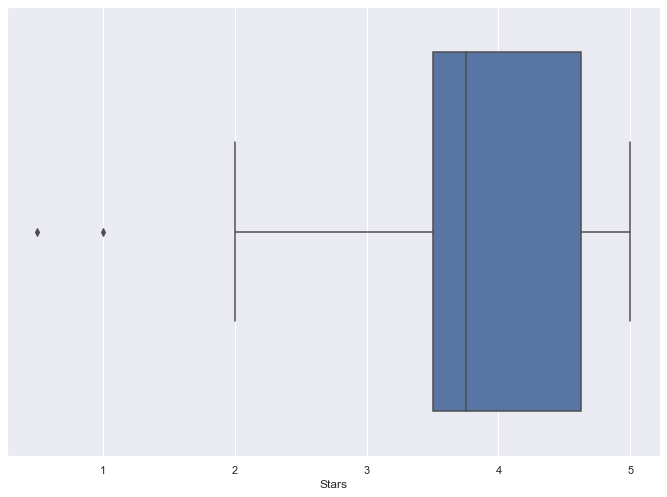

In [72]:
tom_yum = get_df_words(['tom', 'yum'])

box_plot(tom_yum)

In [31]:
filtered_word_freq

{}

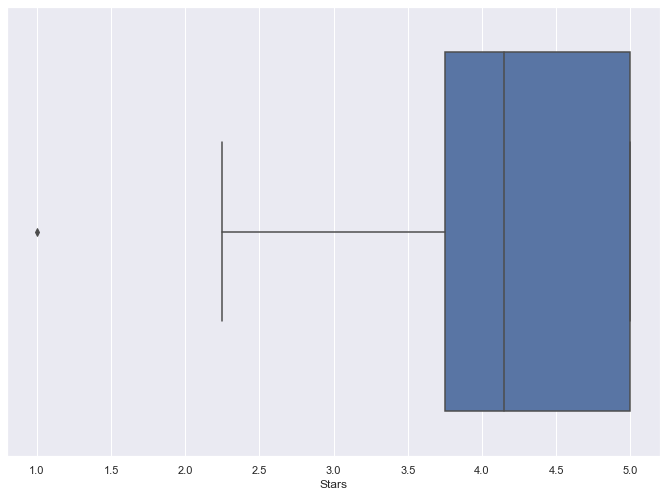

In [261]:
def box_plot(df):
    return sns.boxplot(df['Stars'])
box_plot(tonkotsu)

In [16]:
tonkotsu_high_rating = tonkotsu[tonkotsu['Stars'] >= 4.0]
common_words = get_top_n_gram(tonkotsu_high_rating['Variety'],ngram = 2, n=40, stop_words=ramen_stop_words)
common_words = [(word, freq) for word, freq in common_words if word not in ramen_common_words]
common_bigrams = get_top_n_gram(tonkotsu_high_rating['Variety'],ngram = 2, n=20, stop_words=ramen_stop_words)
for word, freq in common_bigrams:
    print(word, freq)


NameError: name 'ramen_stop_words' is not defined

In [19]:
punct_list = list(punctuation)
fdist = FreqDist()

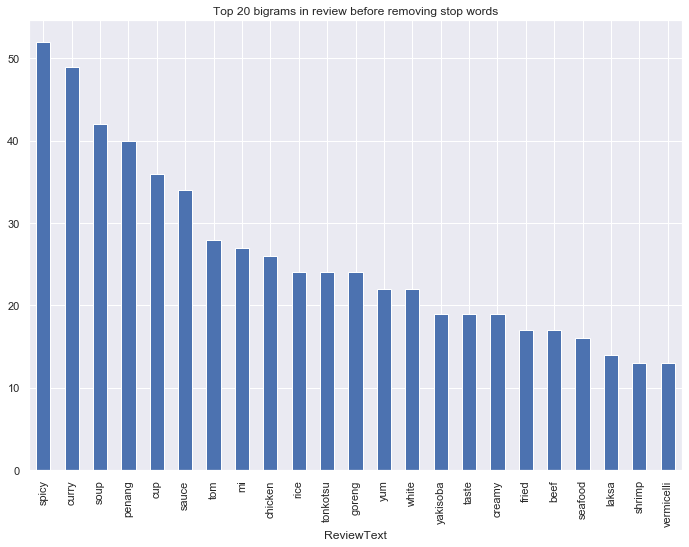

In [86]:

df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind ='bar', title='Top 20 bigrams in review before removing stop words')
#.plot(kind='bar', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [74]:
df3

,ReviewText,count
0,noodle,127
1,noodles,82
2,ramen,75
3,instant,72
4,flavour,64
5,flavor,58
6,spicy,52
7,curry,49
8,soup,42
9,penang,40


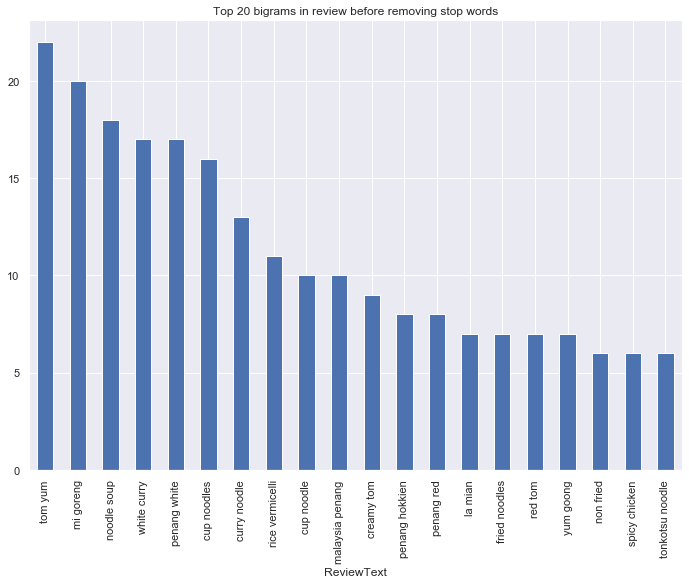

In [62]:

df4 = pd.DataFrame(common_bigrams, columns = ['ReviewText' , 'count'])

df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind ='bar', title='Top 20 bigrams in review before removing stop words')
#.plot(kind='bar', linecolor='black', title='Top 20 bigrams in review before removing stop words')

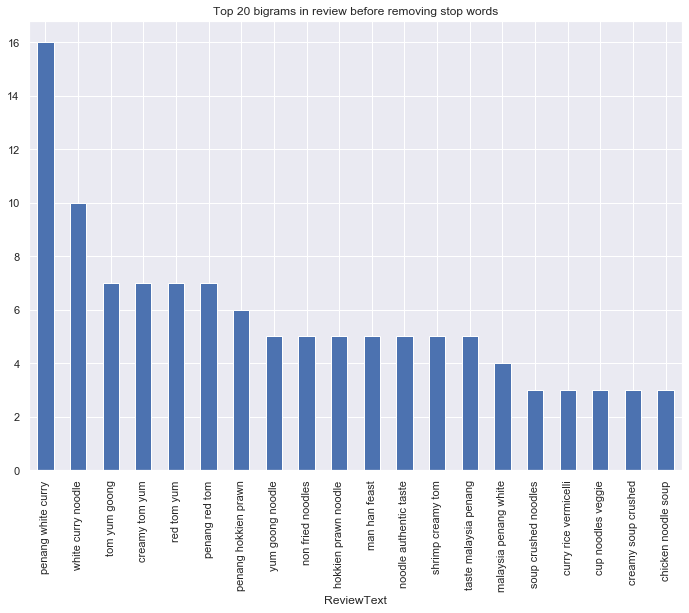

In [75]:
 
df5 = pd.DataFrame(common_trigrams, columns = ['ReviewText' , 'count'])

df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind ='bar', title='Top 20 bigrams in review before removing stop words')
#.plot(kind='bar', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [ ]:
high_ratings[]

In [112]:
high_ratings.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Varity Tokenized
5,2575,samyang foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN,"[Kimchi, song, Song, Ramen]"
10,2570,tao kae noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5,NaN,"[Creamy, tom, Yum, Kung, Flavour]"
11,2569,yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5,NaN,"[Yokohama, Tonkotsu, Shoyu]"
14,2566,nissin,Demae Ramen Bar Noodle Aka Tonkotsu Flavour In...,Pack,Hong Kong,5,NaN,"[Demae, Ramen, Bar, Noodle, Aka, Tonkotsu, Fla..."
17,2563,yamachan,Tokyo Shoyu Ramen,Pack,USA,5,NaN,"[Tokyo, Shoyu, Ramen]"


In [18]:
from nltk.corpus import stopwords
ramen_stop_words = stopwords.words('english')
common_words = ['noodle', 'ramen', 'instant', 'flavour', 'flavor', 'noodles']
ramen_stop_words = ramen_stop_words + common_words + punct_list


filtered_word_freq = dict((word, freq) for word, freq in fdist.items() if word not in ramen_stop_words)

NameError: name 'punct_list' is not defined

In [66]:
filtered_word_freq

{'kimchi': 4,
 'song': 2,
 'creamy': 19,
 'tom': 28,
 'yum': 22,
 'kung': 2,
 'yokohama': 1,
 'tonkotsu': 23,
 'shoyu': 11,
 'demae': 10,
 'bar': 1,
 'aka': 1,
 'tokyo': 3,
 'beef': 17,
 'soup': 42,
 'crushed': 4,
 'hot': 12,
 '&': 13,
 'sour': 6,
 'fish': 2,
 'sapporo': 3,
 'miso': 9,
 'hakata': 5,
 'white': 22,
 'penang': 40,
 'curry': 49,
 'rice': 24,
 'vermicelli': 13,
 'paegaejang': 1,
 'plain': 2,
 'included': 1,
 'laksa': 14,
 'singapura': 2,
 'cup': 36,
 'veggie': 7,
 'spicy': 52,
 'chicken': 26,
 'noodlestom': 1,
 'yam': 6,
 'seafood': 16,
 '(': 35,
 'shrimptacular': 1,
 ')': 34,
 'shin': 6,
 'ramyun': 8,
 'black': 12,
 'nippon': 1,
 'onomichi': 1,
 'juzz': 4,
 "'s": 6,
 'mee': 7,
 'export': 2,
 'version': 6,
 'straits': 2,
 'reborn': 1,
 'hearty': 1,
 'japanese': 7,
 'style': 7,
 'udon': 12,
 'blacl': 1,
 'pepper': 6,
 'crab': 8,
 'angry': 1,
 'man': 5,
 'han': 5,
 'feast': 5,
 'dan': 2,
 'samyang': 1,
 'classic': 1,
 'edition': 4,
 'red': 11,
 'goong': 7,
 'supreme': 1,
 'so

In [35]:
high_ratings[high_ratings['Country'].isin(['USA'])].groupby('Brand').count()

,Review #,Variety,Style,Country,Stars,Top Ten
Brand,,,,,,
annie chun's,1,1,1,1,1,0
daifuku,1,1,1,1,1,0
dream kitchen,1,1,1,1,1,0
goku-uma,1,1,1,1,1,0
jackpot teriyaki,1,1,1,1,1,0
komforte chockolates,1,1,1,1,1,0
maruchan,3,3,3,3,3,0
myojo,1,1,1,1,1,0
nissin,5,5,5,5,5,0


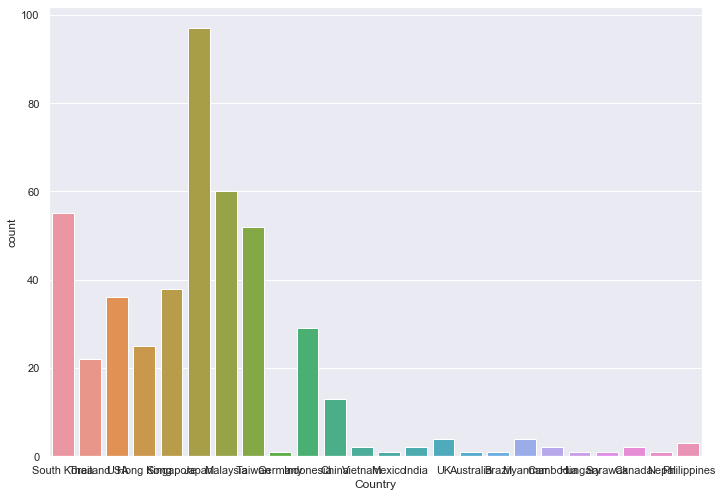

In [21]:
sns.countplot(high_ratings['Country'])

In [61]:
ratings_present.groupby('Country').count()

,Review #,Brand,Variety,Style,Stars,Top Ten
Country,,,,,,
China,1,1,1,1,1,1
Hong Kong,1,1,1,1,1,1
Indonesia,6,6,6,6,6,6
Japan,6,6,6,6,6,6
Malaysia,6,6,6,6,6,6
Myanmar,1,1,1,1,1,1
Singapore,7,7,7,7,7,7
South Korea,7,7,7,7,7,7
Taiwan,2,2,2,2,2,2


In [62]:
ratings_present = ratings_present.reset_index()
ratings_present.head()

index       41
Review #    41
Brand       41
Variety     41
Style       41
Country     41
Stars       41
Top Ten     41
dtype: int64

In [21]:
top_ten = pd.DataFrame(ratings_present['Top Ten'].str.split(' ',1).tolist(),
                                   columns = ['Year','Rank'])

In [52]:
top_ten.count()

Year    41
Rank    37
dtype: int64

In [29]:
ratings_present = ratings_present.merge(top_ten, left_index=True, right_index=True)

ratings_present.head()

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Year,Rank
0,616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,2016,#10
1,633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,2016,#1
2,655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,2016,#8
3,673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,2016,#5
4,752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,2016,#9


In [38]:
ratings_present = ratings_present.drop(columns=['Top Ten'])
np.unique(ratings_present.Year)

array(['\n', '2012', '2013', '2014', '2015', '2016'], dtype=object)

In [55]:
ratings_present[ratings_present.Year.isin(['2012'])]

,index,Review #,Brand,Variety,Style,Country,Stars,Year,Rank
29,1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012,#10
30,2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012,#7
31,2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.5,2012,#5
32,2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5,2012,#3
33,2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012,#6
35,2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.5,2012,#9
36,2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012,#1
37,2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5,2012,#2
40,2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012,#4


In [39]:
ratings_present.groupby('Variety').count()

,index,Review #,Brand,Style,Country,Stars,Year,Rank
Variety,,,,,,,,
Artificial Chicken,1,1,1,1,1,1,1,1
Champong Oriental Noodles,1,1,1,1,1,1,1,0
Cheese Noodle,1,1,1,1,1,1,1,1
Chef Curry Laksa Flavour,1,1,1,1,1,1,1,1
Chef Gold Recipe Mi Kari Seribu Rasa,1,1,1,1,1,1,1,1
Chow Mein,1,1,1,1,1,1,1,1
Gotsumori Sauce Yakisoba,1,1,1,1,1,1,1,1
Hyoubanya No Chukasoba Oriental,1,1,1,1,1,1,1,1
Instant Noodles Coconut Milk Flavour,1,1,1,1,1,1,1,1
